# Problem 1

In [2]:
# import data
import pandas as pd
df=pd.read_csv('C:/Onedrive/OneDrive - Knights - University of Central Florida/UCF/Courses/Smart City/HW1/Bike-Sharing-Dataset/hour.csv')

In [3]:
df.tail ()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [49]:
import numpy as np
# create design matrix X and target vector y
X = np.array(df.iloc[:, [2,4,5,6,7,8,9,10,11,12,13]]) 	# end index is exclusive
Y = np.array(df['cnt']) 	# another way of indexing a pandas df

In [50]:
print(X)

[[  1.       1.       0.     ...,   0.2879   0.81     0.    ]
 [  1.       1.       1.     ...,   0.2727   0.8      0.    ]
 [  1.       1.       2.     ...,   0.2727   0.8      0.    ]
 ..., 
 [  1.      12.      21.     ...,   0.2576   0.6      0.1642]
 [  1.      12.      22.     ...,   0.2727   0.56     0.1343]
 [  1.      12.      23.     ...,   0.2727   0.65     0.1343]]


In [51]:
from sklearn.model_selection import train_test_split

# split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [52]:
# Fit the support vector regression model based on RBF kernel function
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
y_rbf = svr_rbf.fit(X_train, Y_train).predict(X_test)

In [53]:
# Calculate the R square for training dataset and test dataset
tr_score_rbf = svr_rbf.score(X_train, Y_train)
score_rbf = svr_rbf.score(X_test,Y_test)

In [54]:
print(tr_score_rbf, score_rbf)

0.864443662382 0.843163127752


# b: introduciong linear and polynomial kernel function

In [57]:
# Fit the support vector regression model based on linear kernel function
svr_lin = SVR(kernel='linear', C=1e3)
y_lin = svr_lin.fit(X_train, Y_train).predict(X_test)

tr_score_lin = svr_lin.score(X_train, Y_train)
score_lin = svr_lin.score(X_test,Y_test)

In [58]:
print(tr_score_lin, score_lin)

0.293427919952 0.297725832634


In [59]:
# Fit the support vector regression model based on polynomial kernel function
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_poly = svr_poly.fit(X_train, Y_train).predict(X_test)

tr_score_poly = svr_poly.score(X_train, Y_train)
score_poly = svr_poly.score(X_test,Y_test)

In [60]:
print(tr_score_poly, score_poly)

0.401602774677 0.400864558388


# c: Plot the accuracy levels 

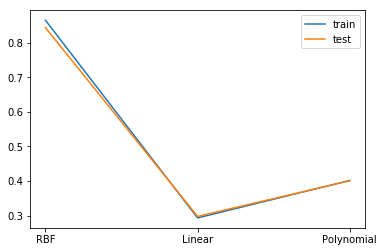

In [61]:
# Plot the accuracy level for different kernel function
import matplotlib.pyplot as plt
%matplotlib inline

x=np.array([1,2,3])
tr_accuracy=np.array([tr_score_rbf, tr_score_lin, tr_score_poly])
tst_accuracy=np.array([score_rbf, score_lin, score_poly])
my_xticks = ['RBF','Linear','Polynomial']
plt.xticks(x, my_xticks)
plt.plot(x,tr_accuracy, label='train')
plt.plot(x,tst_accuracy, label='test')

plt.legend()
plt.show()